# $\mu \to e\gamma$ Constraint in Randall-Sundrum

This notebook demonstrates the lepton flavor violation bound from $\mu \to e\gamma$ using the NDA dipole estimate from Perez & Randall ([arXiv:0805.4652](https://arxiv.org/abs/0805.4652)).

The branching ratio is estimated as

$$
\mathrm{BR}(\mu \to e\gamma) \simeq 4 \times 10^{-8}\,
\left|(\bar{Y}_N \bar{Y}_N^\dagger)_{12}\right|^2
\left(\frac{3\;\mathrm{TeV}}{M_{KK}}\right)^4
$$

which translates to the bound

$$
\left|(\bar{Y}_N \bar{Y}_N^\dagger)_{12}\right| \le C \left(\frac{M_{KK}}{3\;\mathrm{TeV}}\right)^2,
\qquad C = \sqrt{\frac{\mathrm{BR}_{\mathrm{limit}}}{4 \times 10^{-8}}}.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from yukawa import compute_all_yukawas
from flavorConstraints import (
    check_mu_to_e_gamma,
    coefficient_from_br_limit,
    C_PAPER,
    PREFAC_BR,
)

## 1. Perez–Randall benchmark point

We use the same benchmark parameters as in the paper (Table I):
$c_L = 0.58$, $c_N = 0.27$, $c_E = (0.75, 0.60, 0.50)$, $M_N = 1.22 \times 10^{18}$ GeV.

In [2]:
result = compute_all_yukawas(
    Lambda_IR=3000,
    c_L=0.58,
    c_E=[0.75, 0.60, 0.50],
    c_N=0.27,
    M_N=1.22e18,
    lightest_nu_mass=0.002,
    ordering='normal',
)

print(f"Y_N_bar = {result.Y_N_bar}")
print(f"Y_E_bar = {result.Y_E_bar}")

Y_N_bar = [0.20416916 0.43081761 1.02432944]
Y_E_bar = [2.93642205 4.37194328 5.41938662]


### Check against the paper-era bound ($C = 0.02$)

The paper used the MEGA limit $\mathrm{BR}(\mu \to e\gamma) < 1.2 \times 10^{-11}$, giving $C = 0.02$ (Eq. 4.14).

In [3]:
lfv_paper = check_mu_to_e_gamma(result, C=C_PAPER)

print(f"|(Y_N_bar Y_N_bar^dag)_12| = {lfv_paper['lhs']:.6f}")
print(f"Bound (C_paper)            = {lfv_paper['rhs']:.6f}")
print(f"Ratio                      = {lfv_paper['ratio']:.3f}")
print(f"Passes                     = {lfv_paper['passes']}")

|(Y_N_bar Y_N_bar^dag)_12| = 0.072344
Bound (C_paper)            = 0.020000
Ratio                      = 3.617
Passes                     = False


### Check against the MEG II 2024 limit

The MEG II collaboration (2024) set $\mathrm{BR}(\mu \to e\gamma) < 7.5 \times 10^{-13}$ at 90% CL, which is $\sim 16\times$ stronger than the MEGA limit used in the paper.

In [4]:
BR_MEGII_2024 = 7.5e-13
C_MEGII = coefficient_from_br_limit(BR_MEGII_2024)

print(f"C (paper, MEGA)  = {C_PAPER}")
print(f"C (MEG II 2024)  = {C_MEGII:.6f}")
print(f"Tightening factor: {C_PAPER / C_MEGII:.1f}x")

C (paper, MEGA)  = 0.02
C (MEG II 2024)  = 0.004330
Tightening factor: 4.6x


In [5]:
lfv_megii = check_mu_to_e_gamma(result, C=C_MEGII)

print(f"|(Y_N_bar Y_N_bar^dag)_12| = {lfv_megii['lhs']:.6f}")
print(f"Bound (MEG II)             = {lfv_megii['rhs']:.6f}")
print(f"Ratio                      = {lfv_megii['ratio']:.3f}")
print(f"Passes                     = {lfv_megii['passes']}")

|(Y_N_bar Y_N_bar^dag)_12| = 0.072344
Bound (MEG II)             = 0.004330
Ratio                      = 16.707
Passes                     = False


## 2. Minimum $M_{KK}$ as a function of the experimental limit

For a given parameter point, the LFV spurion $|(\bar{Y}_N \bar{Y}_N^\dagger)_{12}|$ is fixed. The bound becomes

$$
M_{KK}^{\min} = 3\;\mathrm{TeV} \times \sqrt{\frac{\mathrm{LHS}}{C}}
$$

As the experimental limit improves ($C$ decreases), $M_{KK}^{\min}$ rises.

In [6]:
lhs_benchmark = lfv_paper['lhs']

# Scan over BR limits from MEGA era to future projections
br_limits = np.logspace(-11, -14, 200)
C_values = np.array([coefficient_from_br_limit(br) for br in br_limits])
min_mkk = 3000.0 * np.sqrt(lhs_benchmark / C_values)  # GeV

# Key experimental milestones
milestones = {
    'MEGA (1999)':        1.2e-11,
    'MEG (2016)':         4.2e-13,
    'MEG II (2024)':      7.5e-13,
}

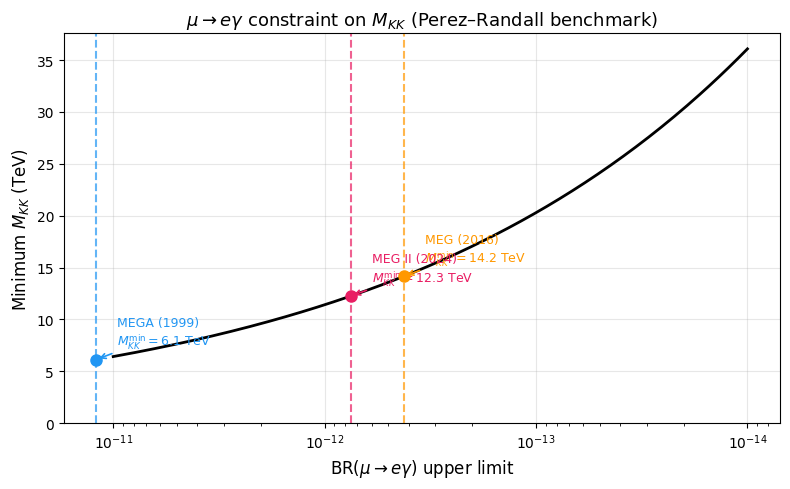

In [7]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(br_limits, min_mkk / 1000, 'k-', linewidth=2)

colors = {'MEGA (1999)': '#2196F3', 'MEG (2016)': '#FF9800', 'MEG II (2024)': '#E91E63'}
for label, br in milestones.items():
    c_val = coefficient_from_br_limit(br)
    mkk_val = 3000.0 * np.sqrt(lhs_benchmark / c_val) / 1000
    ax.axvline(br, color=colors[label], linestyle='--', alpha=0.7)
    ax.plot(br, mkk_val, 'o', color=colors[label], markersize=8, zorder=5)
    ax.annotate(f'{label}\n$M_{{KK}}^{{\\min}} = {mkk_val:.1f}$ TeV',
                xy=(br, mkk_val), xytext=(15, 10), textcoords='offset points',
                fontsize=9, color=colors[label],
                arrowprops=dict(arrowstyle='->', color=colors[label], lw=1.2))

ax.set_xscale('log')
ax.set_xlabel(r'BR($\mu \to e\gamma$) upper limit', fontsize=12)
ax.set_ylabel(r'Minimum $M_{KK}$ (TeV)', fontsize=12)
ax.set_title(r'$\mu \to e\gamma$ constraint on $M_{KK}$ (Perez–Randall benchmark)', fontsize=13)
ax.invert_xaxis()
ax.grid(True, alpha=0.3)
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()

## 3. Excluded region in the $(M_{KK},\; |(\bar{Y}_N \bar{Y}_N^\dagger)_{12}|)$ plane

The bound defines an excluded region above the line $|(12)| = C \times (M_{KK}/3\;\mathrm{TeV})^2$. We plot the exclusion contours for both the paper-era and MEG II limits, with the benchmark point overlaid.

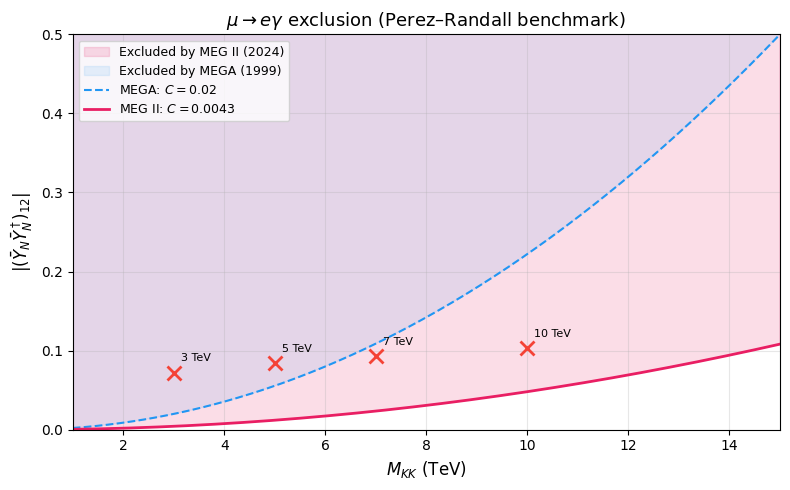

In [8]:
mkk_range = np.linspace(1000, 15000, 300)  # GeV

bound_paper = C_PAPER * (mkk_range / 3000) ** 2
bound_megii = C_MEGII * (mkk_range / 3000) ** 2

fig, ax = plt.subplots(figsize=(8, 5))

# Excluded regions (above the lines)
ax.fill_between(mkk_range / 1000, bound_megii, 2.0,
                alpha=0.15, color='#E91E63', label='Excluded by MEG II (2024)')
ax.fill_between(mkk_range / 1000, bound_paper, 2.0,
                alpha=0.10, color='#2196F3', label='Excluded by MEGA (1999)')

# Bound lines
ax.plot(mkk_range / 1000, bound_paper, '--', color='#2196F3', linewidth=1.5,
        label=f'MEGA: $C = {C_PAPER}$')
ax.plot(mkk_range / 1000, bound_megii, '-', color='#E91E63', linewidth=2,
        label=f'MEG II: $C = {C_MEGII:.4f}$')

# Benchmark point at different M_KK values
mkk_points = [3000, 5000, 7000, 10000]
for mkk in mkk_points:
    r = compute_all_yukawas(
        Lambda_IR=mkk, c_L=0.58, c_E=[0.75, 0.60, 0.50],
        c_N=0.27, M_N=1.22e18, lightest_nu_mass=0.002, ordering='normal',
    )
    lfv = check_mu_to_e_gamma(r, C=C_MEGII)
    marker = 'o' if lfv['passes'] else 'x'
    color = '#4CAF50' if lfv['passes'] else '#F44336'
    ax.plot(mkk / 1000, lfv['lhs'], marker, color=color, markersize=10,
            markeredgewidth=2, zorder=5)
    ax.annotate(f'{mkk/1000:.0f} TeV', xy=(mkk / 1000, lfv['lhs']),
                xytext=(5, 8), textcoords='offset points', fontsize=8)

ax.set_xlabel(r'$M_{KK}$ (TeV)', fontsize=12)
ax.set_ylabel(r'$|(\bar{Y}_N \bar{Y}_N^\dagger)_{12}|$', fontsize=12)
ax.set_title(r'$\mu \to e\gamma$ exclusion (Perez–Randall benchmark)', fontsize=13)
ax.legend(fontsize=9, loc='upper left')
ax.set_ylim(0, 0.5)
ax.set_xlim(1, 15)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Summary table

The benchmark point at various $M_{KK}$ values, checked against both the paper-era and MEG II bounds.

In [9]:
print(f"{'M_KK (GeV)':>12}  {'|(12)|':>10}  {'Paper bound':>12}  {'Paper?':>7}  {'MEG II bound':>13}  {'MEG II?':>8}")
print('-' * 72)

for mkk in [3000, 4000, 5000, 6000, 7000, 8000, 10000]:
    r = compute_all_yukawas(
        Lambda_IR=mkk, c_L=0.58, c_E=[0.75, 0.60, 0.50],
        c_N=0.27, M_N=1.22e18, lightest_nu_mass=0.002, ordering='normal',
    )
    lfv_p = check_mu_to_e_gamma(r, C=C_PAPER)
    lfv_m = check_mu_to_e_gamma(r, C=C_MEGII)

    pass_p = 'PASS' if lfv_p['passes'] else 'FAIL'
    pass_m = 'PASS' if lfv_m['passes'] else 'FAIL'
    print(f"{mkk:>12}  {lfv_p['lhs']:>10.6f}  {lfv_p['rhs']:>12.6f}  {pass_p:>7}  {lfv_m['rhs']:>13.6f}  {pass_m:>8}")

  M_KK (GeV)      |(12)|   Paper bound   Paper?   MEG II bound   MEG II?
------------------------------------------------------------------------
        3000    0.072344      0.020000     FAIL       0.004330      FAIL
        4000    0.078853      0.035556     FAIL       0.007698      FAIL
        5000    0.084302      0.055556     FAIL       0.012028      FAIL
        6000    0.089033      0.080000     FAIL       0.017321      FAIL
        7000    0.093238      0.108889     PASS       0.023575      FAIL
        8000    0.097042      0.142222     PASS       0.030792      FAIL
       10000    0.103746      0.222222     PASS       0.048113      FAIL
